In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [179]:
# 데이터 불러오기
DATA_FILE= '../data/iris.csv'
IRIS_DF= pd.read_csv(DATA_FILE)
print(IRIS_DF.head())
print(IRIS_DF.columns)



   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [180]:
# 데이터 100개까지 (이진분류)
IRIS_DF= IRIS_DF.iloc[:100]
IRIS_DF.info(), IRIS_DF['variety'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  100 non-null    float64
 1   sepal.width   100 non-null    float64
 2   petal.length  100 non-null    float64
 3   petal.width   100 non-null    float64
 4   variety       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


(None,
 variety
 Setosa        50
 Versicolor    50
 Name: count, dtype: int64)

In [181]:
# 피쳐 개수 뭐쓸까?   ---> num과 상관계수가 제일 높은 (petal.length, petal.width)
# 품종 숫자 컬럼 추가 (Setosa=0, Versicolor=1)
IRIS_DF['num']=IRIS_DF['variety'].replace({'Setosa': 0, 'Versicolor':1})
IRIS_DF.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width,num
sepal.length,1.000000,-0.205926,0.812458,0.789608,0.728290
sepal.width,-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal.length,0.812458,-0.602663,1.000000,0.979322,0.969990
petal.width,0.789608,-0.570883,0.979322,1.000000,0.960307
num,0.728290,-0.690684,0.969990,0.960307,1.000000


In [182]:
# 피쳐와 타겟 분리
# 피쳐=petal.length	petal.width
# 타겟= num
features= IRIS_DF[['petal.length', 'petal.width']]
target= IRIS_DF['num']

In [183]:
# 모델 인스턴스 생성
model= KNeighborsClassifier()
# 훈련, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test= train_test_split(features, target, test_size=.3, stratify=target,
                                                   random_state=1) #-> 섞는거 고정


In [184]:
# 분리된 데이터 확인
print(f'x_train: {X_train.shape}, {X_train.ndim}')
print(f'Y_train: {Y_train.shape}, {Y_train.ndim}')
print(f'Xtest: {X_test.shape}, {X_test.ndim}')
print(f'Y_test: {Y_test.shape}, {Y_test.ndim}')

x_train: (70, 2), 2
Y_train: (70,), 1
Xtest: (30, 2), 2
Y_test: (30,), 1


In [185]:
# 학습 진행
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [186]:
# 학습 진행 후 파라미터
model.classes_,model.feature_names_in_, model.n_samples_fit_   

(array([0, 1], dtype=int64),
 array(['petal.length', 'petal.width'], dtype=object),
 70)

In [187]:
print(model.score(X_test, Y_test))
print((model.predict(X_test)==Y_test).value_counts())

1.0
num
True    30
Name: count, dtype: int64


In [188]:
# 임이의 데이터 생성 1.7, 0.1
test_data=[[1.7,.1]]
a=pd.DataFrame(test_data, columns=model.feature_names_in_)
print(a)

   petal.length  petal.width
0           1.7          0.1


In [189]:
model.predict(a)

array([0], dtype=int64)

In [190]:
# a와 근접한 K5개 찾기
distance, index= model.kneighbors(a)
print(distance, index)
# index가 2D이므로 1D로 변환
neighbors= index.reshape(-1).tolist()
print(neighbors)

[[0.14142136 0.2        0.2        0.2        0.2236068 ]] [[57 31 66 11  1]]
[57, 31, 66, 11, 1]


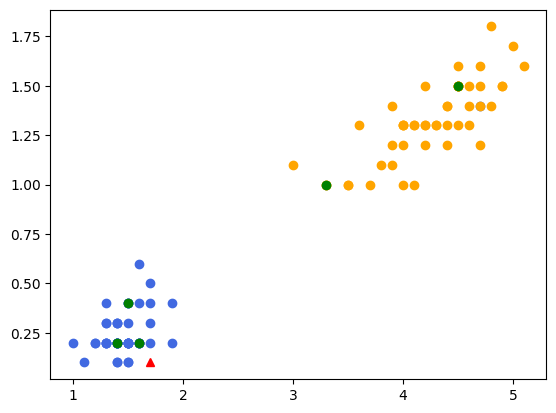

In [191]:
# 시각화
plt.scatter(IRIS_DF.loc[:50]['petal.length'], IRIS_DF.loc[:50]['petal.width'], color='royalblue') #setosa
plt.scatter(IRIS_DF.loc[51:]['petal.length'], IRIS_DF.loc[51:]['petal.width'], color='orange')
plt.scatter(IRIS_DF.loc[neighbors]['petal.length'], IRIS_DF.loc[neighbors]['petal.width'], color='green')
plt.plot(a['petal.length'], a['petal.width'], 'r^')
plt.show()

In [192]:
# k값들이 떨어져 있음-> scaling?
